In [ ]:
# This script clips each NLDAS daily file comprised of Qs and Qsb to just Mississippi.  
# The functions makes uses of a shapefile, the same shapefile used to create figure 1.

In [1]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
x = glob.glob('summed/*.nc')
print(len(x))

2617


In [3]:
x0 = xr.open_dataset(x[0])
x0

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (lat: 224, lon: 464)
Coordinates:
  * lon         (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat         (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
Data variables:
    Qs_summed   (lat, lon) float32 ...
    Qsb_summed  (lat, lon) float32 ...

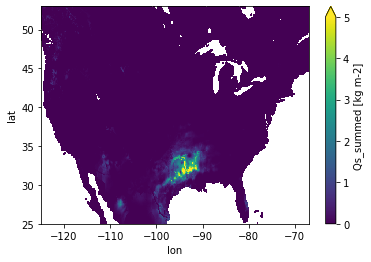

In [4]:
x0.Qs_summed.plot(vmin=0,vmax=5)

In [22]:
x[0]

'summed/NLDAS_VIC0125_H.A20150101_SUMMED.nc'

In [6]:
from shapely.geometry import mapping
import geopandas

def clip2(raster,basin,basinname):
    rast = xr.open_dataset(raster,decode_coords="all")
    rast.rio.write_crs(4326,inplace=True)
    rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
    r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
#     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
    r_clip.to_netcdf(f'nldas_clip2_{basinname}.nc')
    return r_clip

# raster = x[0] #selected first 
basin = geopandas.read_file('/work/albertl_uri_edu/fluxtoflow/smap__part1__archived/bear_river/bearrivshp/brfromhuc12.shp')

clip2(x[0],basin,'bear_river')

ERROR 1: PROJ: proj_create_from_database: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It c

In [8]:
y = xr.open_dataset('nldas_clip2_bear_river.nc')
y

<xarray.Dataset>
Dimensions:      (lat: 16, lon: 15)
Coordinates:
  * lat          (lat) float32 40.81 40.94 41.06 41.19 ... 42.44 42.56 42.69
  * lon          (lon) float32 -112.4 -112.3 -112.2 ... -110.9 -110.8 -110.7
    spatial_ref  int64 ...
Data variables:
    Qs_summed    (lat, lon) float32 ...
    Qsb_summed   (lat, lon) float32 ...

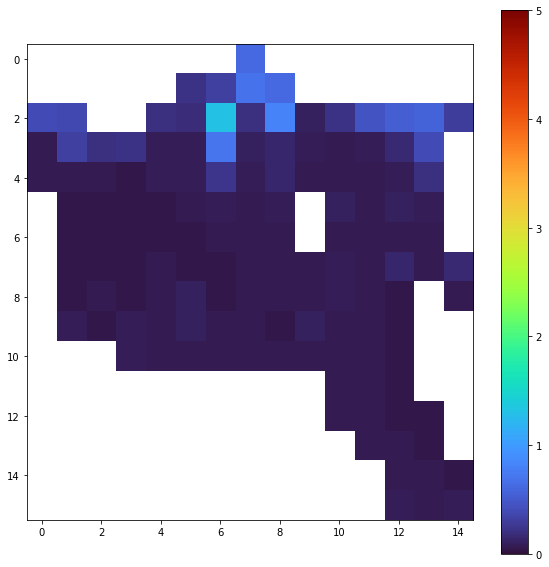

In [11]:
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.imshow(np.flipud(y.Qsb_summed),cmap='turbo',vmin=0,vmax=5)
plt.colorbar()
# y.Qs_summed.plot(vmin=0,vmax=5)

In [20]:
x[0][7:32]

'NLDAS_VIC0125_H.A20150101'

In [12]:
from shapely.geometry import mapping
import geopandas

def clip2(raster,basin):
    rast = xr.open_dataset(raster,decode_coords="all")
    rast.rio.write_crs(4326,inplace=True)
    rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
    r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
#     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
    r_clip.to_netcdf(f'clipped__br/{raster[7:32]}_br_clipped.nc')
    return r_clip

# raster = x[0] #selected first 

basin = geopandas.read_file('/work/albertl_uri_edu/fluxtoflow/smap__part1__archived/bear_river/bearrivshp/brfromhuc12.shp')


for i in x:
    clip2(i,basin)

ERROR 1: PROJ: proj_create_from_database: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /work/albertl_uri_edu/.conda/envs/sm/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It c